In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.shape

(39717, 111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

### Missing values

##### Checking for null columns

In [4]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Dropping all columns having only null values

In [6]:
df.dropna(axis=1, how='all', inplace=True)

In [7]:
df.shape

(39717, 57)

In [8]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

##### Additional columns to be removed
- Columns like next_pymnt_d, mths_since_last_record, mths_since_last_delinq have too many null values hence they are useless
- desc, emp_title, url, title are of no use in this case
- collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens columns have only 0 and NA
- last_pymnt_d, last_credit_pull_d are also of no use in this case

In [9]:
df.drop(columns=['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'emp_title', 'url', 'title', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 'last_pymnt_d', 'last_credit_pull_d'], axis=1, inplace=True)

In [10]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

##### Searching for columns having only one unique value
These columns can be droped because there cannot be any analysis done

In [11]:
df.drop(columns = [c for c in list(df) if len(df[c].unique()) == 1], axis=1, inplace=True)

In [12]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

### Assigning values
###### emp_length

For 'emp_length' column lets assume 0 as less than 1 year and 10 >= 10 years, other numbers remain as it is

In [13]:
df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [14]:
df.emp_length.unique()[:-1]

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [15]:
df = df.replace(df.emp_length.unique()[:-1], [10, 0, 1, 3, 8, 9, 4, 5, 6, 2, 7])

In [16]:
df.emp_length.describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

Since mean and median of the emp_length are almost equal, filling up the missing values by 4

In [17]:
df.emp_length.fillna(4, inplace=True)

In [16]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

##### revol_util

In [18]:
df.revol_util.value_counts()

0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

Changing values to float

In [21]:
df.revol_util = df.revol_util.apply(lambda x: x if type(x) == float else float(x[:-1]))

In [22]:
df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

Since there is not much difference between mean and median, replacing null values with mean

In [23]:
df.revol_util.fillna(df.revol_util.mean(), inplace=True)

##### int_rate
Similarly converting interest rate to float

In [24]:
df.int_rate = df.int_rate.apply(lambda x: x if type(x) == float else float(x[:-1]))

In [25]:
df.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

##### pub_rec_bankruptcies       

In [26]:
df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Since mean and median are nearly same i.e. 0, replacing null vlaues by 0

In [27]:
df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [28]:
df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

##### home_ownership             

In [30]:
df.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

As per data dictionary, there are only 4 values for home ownership RENT, MORTGAGE, OWN, OTHER.
Also, RENT has maximum count. Hence, replacing 3 NONE values with RENT

In [31]:
df.home_ownership = df.home_ownership.replace("NONE", 'RENT')

#### The current loans are not going to help in analysis. Hence dropping the same

In [32]:
df = df[df.loan_status != 'Current']

### Removing outliers

#### Total income

<AxesSubplot:>

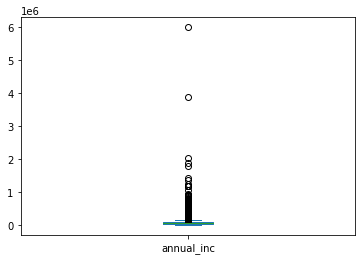

In [33]:
df.annual_inc.plot.box()

In [34]:
#Removing outliers based on 95 percentile rule
df = df[df.annual_inc <= df.annual_inc.quantile(0.95)]

<AxesSubplot:>

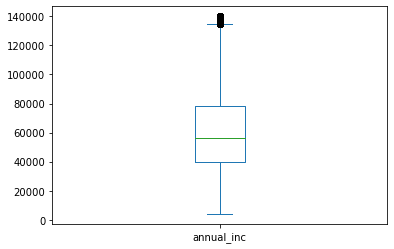

In [35]:
df.annual_inc.plot.box()

### Loan amount

<AxesSubplot:>

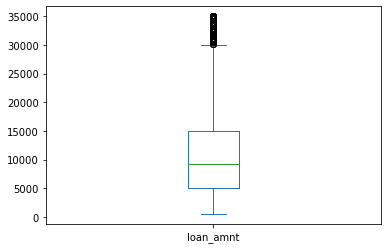

In [36]:
df.loan_amnt.plot.box()

There are not many outlier hence keeping the records same

In [37]:
df.loan_amnt.quantile(0.95)

25000.0

### Deriving values

#### Month and year from date 

In [38]:
#Converting mmm-yy to date
pd.to_datetime(df.issue_d, format='%b-%y')

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39711   2007-07-01
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 36654, dtype: datetime64[ns]

In [39]:
df['issue_month']=df.issue_d.apply(lambda x: dt.datetime.strptime(x, '%b-%y').month)

In [40]:
df['issue_year']=df.issue_d.apply(lambda x: dt.datetime.strptime(x, '%b-%y').year)

#### Savings from installment and monthly income

In [41]:
df['monthly_savings']=(df.annual_inc / 12) - df.installment

In [46]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,0.0,12,2011,1837.13
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,0.0,12,2011,2440.17
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,0.0,12,2011,936.67
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0,12,2011,3760.69
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,161.03,0.0,12,2011,2843.54


In [60]:
df.shape

(36654, 42)

### Exploring Columns

In [58]:
df.iloc[0:7, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT


In [62]:
df.iloc[0:7, 12:24]

,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
0,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3
1,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3
2,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2
3,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10
5,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9
6,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7
7,48000.0,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,0,Jan-07,2,4


In [63]:
df.iloc[0:7, 24:36]

,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
0,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00
1,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08
2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00
3,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00
5,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00
6,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00
7,0,8221,87.5,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00


In [64]:
df.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings
0,0.00,171.62,0.0,12,2011,1837.13
1,1.11,119.66,0.0,12,2011,2440.17
2,0.00,649.91,0.0,12,2011,936.67
3,0.00,357.48,0.0,12,2011,3760.69
5,0.00,161.03,0.0,12,2011,2843.54
6,0.00,1313.76,0.0,12,2011,3746.92
7,0.00,111.34,0.0,12,2011,3890.57


In [67]:
df.loan_amnt.value_counts()

10000    2688
12000    2148
5000     1979
6000     1836
15000    1713
         ... 
14725       1
15025       1
19250       1
14775       1
15650       1
Name: loan_amnt, Length: 854, dtype: int64

In [79]:
df.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

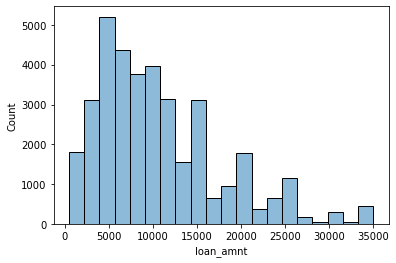

In [77]:
sns.histplot(df, x="loan_amnt",bins=20, alpha=0.5)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

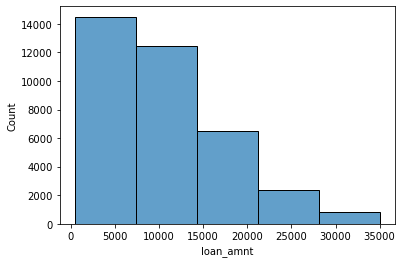

In [69]:
sns.histplot(df, x="loan_amnt", bins=5, alpha=0.7)

### Exploring relationship between Loan Amount and Delinquency

In [88]:
df = df.drop(['binned'], axis=1)
df.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings,loan_amnt_bin
0,0.00,171.62,0.0,12,2011,1837.13,0-5k
1,1.11,119.66,0.0,12,2011,2440.17,0-5k
2,0.00,649.91,0.0,12,2011,936.67,0-5k
3,0.00,357.48,0.0,12,2011,3760.69,5k-10k
5,0.00,161.03,0.0,12,2011,2843.54,0-5k
6,0.00,1313.76,0.0,12,2011,3746.92,5k-10k
7,0.00,111.34,0.0,12,2011,3890.57,0-5k


In [89]:
# binning or bucketing with labels

bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels =['0-5k','5k-10k','10k-15k','15k-20k', '20k-25k', '25k-30k', '30k-35k', '35k-40k']
df['loan_amnt_bin'] = pd.cut(df['loan_amnt'], bins,labels=labels)
df.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings,loan_amnt_bin
0,0.00,171.62,0.0,12,2011,1837.13,0-5k
1,1.11,119.66,0.0,12,2011,2440.17,0-5k
2,0.00,649.91,0.0,12,2011,936.67,0-5k
3,0.00,357.48,0.0,12,2011,3760.69,5k-10k
5,0.00,161.03,0.0,12,2011,2843.54,0-5k
6,0.00,1313.76,0.0,12,2011,3746.92,5k-10k
7,0.00,111.34,0.0,12,2011,3890.57,0-5k


In [107]:
df1 = df[['loan_amnt_bin','loan_status' ,'member_id']]
df1.head()

,loan_amnt_bin,loan_status,member_id
0,0-5k,Fully Paid,1296599
1,0-5k,Charged Off,1314167
2,0-5k,Fully Paid,1313524
3,5k-10k,Fully Paid,1277178
5,0-5k,Fully Paid,1311441


In [128]:
df1_pivot = pd.pivot_table(df1, index='loan_amnt_bin', values = 'member_id',  aggfunc='count')
df1_pivot.head()

,member_id
loan_amnt_bin,
0-5k,9320
5k-10k,12424
10k-15k,7327
15k-20k,4053
20k-25k,2413


In [129]:


df2_pivot = pd.pivot_table(df1, index='loan_amnt_bin', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df2_pivot.head()

loan_status,Charged Off,Fully Paid
loan_amnt_bin,,
0-5k,1299,8021
5k-10k,1607,10817
10k-15k,1027,6300
15k-20k,723,3330
20k-25k,485,1928


In [130]:
df2_pivot['Ch_O_%'] = round((df2_pivot['Charged Off']/(df2_pivot['Fully Paid']+df2_pivot['Charged Off'])*100),2)
df2_pivot.head()

loan_status,Charged Off,Fully Paid,Ch_O_%
loan_amnt_bin,,,
0-5k,1299,8021,13.94
5k-10k,1607,10817,12.93
10k-15k,1027,6300,14.02
15k-20k,723,3330,17.84
20k-25k,485,1928,20.10


In [131]:
df2_pivot['FP_%'] = round((df2_pivot['Fully Paid']/(df2_pivot['Fully Paid']+df2_pivot['Charged Off'])*100),2)
df2_pivot.head()

loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
loan_amnt_bin,,,,
0-5k,1299,8021,13.94,86.06
5k-10k,1607,10817,12.93,87.07
10k-15k,1027,6300,14.02,85.98
15k-20k,723,3330,17.84,82.16
20k-25k,485,1928,20.10,79.90


<AxesSubplot:xlabel='loan_amnt_bin'>

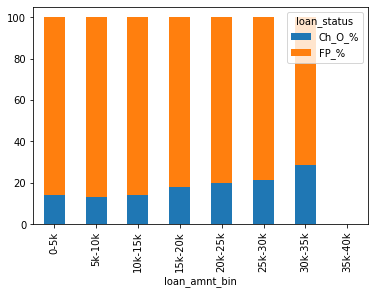

In [134]:
df2_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

### Interim Takeaway: There's an increasing trend of delinquency with increasing loan amount
#### Parking this analysis here for now

### ---   ---   ---

### Exploring Relationship with loan amount and duration for loan amounts <=5000

In [135]:
df.iloc[0:7, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8.0,RENT
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9.0,RENT


In [139]:
df_5k = df.loc[df['loan_amnt'] <= 5000]
df_5k.iloc[0:7, 12:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9.0,RENT
13,1069866,1304956,3000,3000,3000.0,36 months,9.91,96.68,B,B1,3.0,RENT
15,1069759,1304871,1000,1000,1000.0,36 months,16.29,35.31,D,D1,0.0,RENT


In [140]:
df_5k.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings,loan_amnt_bin
0,0.00,171.62,0.0,12,2011,1837.130000,0-5k
1,1.11,119.66,0.0,12,2011,2440.170000,0-5k
2,0.00,649.91,0.0,12,2011,936.670000,0-5k
5,0.00,161.03,0.0,12,2011,2843.540000,0-5k
7,0.00,111.34,0.0,12,2011,3890.570000,0-5k
13,0.00,102.43,0.0,12,2011,1153.320000,0-5k
15,0.00,36.32,0.0,12,2011,2298.023333,0-5k


In [147]:
df5k_1 = df_5k[['term','loan_status' ,'member_id']]
df5k_1.head()

,term,loan_status,member_id
0,36 months,Fully Paid,1296599
1,60 months,Charged Off,1314167
2,36 months,Fully Paid,1313524
5,36 months,Fully Paid,1311441
7,36 months,Fully Paid,1288686


In [149]:
#df5k1_pivot = pd.pivot_table(df5k_1, index='term', values = 'member_id',  aggfunc='count')
df5k1_pivot.head()

,member_id
term,
36 months,8314
60 months,1006


In [150]:
df5k2_pivot = pd.pivot_table(df5k_1, index='term', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df5k2_pivot.head()

loan_status,Charged Off,Fully Paid
term,,
36 months,1040,7274
60 months,259,747


In [152]:
df5k2_pivot['Ch_O_%'] = round((df5k2_pivot['Charged Off']/(df5k2_pivot['Fully Paid']+df5k2_pivot['Charged Off'])*100),2)
df5k2_pivot['FP_%'] = round((df5k2_pivot['Fully Paid']/(df5k2_pivot['Fully Paid']+df5k2_pivot['Charged Off'])*100),2)
df5k2_pivot.head()

loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
term,,,,
36 months,1040,7274,12.51,87.49
60 months,259,747,25.75,74.25


<AxesSubplot:xlabel='term'>

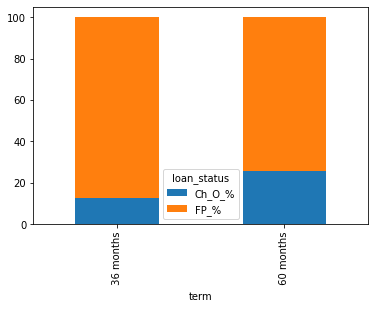

In [154]:
df5k2_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

In [162]:
df_10k = df.loc[df['loan_amnt_bin'] == '5k-10k']
df10k_1 = df_10k[['term','loan_status' ,'member_id']]
#df10k_1.head()
df_10k.iloc[0:7, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8.0,RENT
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,4.0,OWN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,0.0,RENT
10,1070078,1305201,6500,6500,6500.0,60 months,14.65,153.45,C,C3,5.0,OWN
12,1064687,1298717,9000,9000,9000.0,36 months,13.49,305.38,C,C1,0.0,RENT
14,1069057,1303503,10000,10000,10000.0,36 months,10.65,325.74,B,B2,3.0,RENT


In [163]:
df10k2_pivot = pd.pivot_table(df10k_1, index='term', columns = 'loan_status', values = 'member_id',  aggfunc='count')
#df10k2_pivot.head()

df10k2_pivot['Ch_O_%'] = round((df10k2_pivot['Charged Off']/( df10k2_pivot['Fully Paid']+ df10k2_pivot['Charged Off'])*100),2)
df10k2_pivot['FP_%'] = round((df10k2_pivot['Fully Paid']/( df10k2_pivot['Fully Paid']+ df10k2_pivot['Charged Off'])*100),2)
df10k2_pivot.head()



loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
term,,,,
36 months,1118,9316,10.71,89.29
60 months,489,1501,24.57,75.43


<AxesSubplot:xlabel='term'>

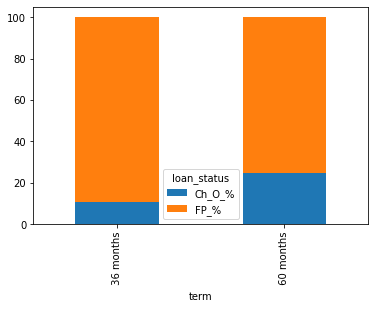

In [164]:
df10k2_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

In [165]:
df_15k = df.loc[df['loan_amnt_bin'] == '10k-15k']
df15k_1 = df_15k[['term','loan_status' ,'member_id']]
#df15k_1.head()
df_15k.iloc[0:7, 0:12]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
11,1069908,1305008,12000,12000,12000.0,36 months,12.69,402.54,B,B5,10.0,OWN
25,1069697,1273773,15000,15000,15000.0,36 months,9.91,483.38,B,B1,2.0,MORTGAGE
26,1069800,1304679,15000,15000,8725.0,36 months,14.27,514.64,C,C2,9.0,RENT
35,1069522,1304589,12400,12400,12400.0,36 months,10.65,403.91,B,B2,10.0,RENT
36,1069361,1304255,10800,10800,10800.0,36 months,9.91,348.03,B,B1,2.0,RENT
37,1069357,1304251,15000,15000,15000.0,36 months,7.90,469.36,A,A4,1.0,RENT
41,1069506,1304567,12000,12000,12000.0,36 months,7.90,375.49,A,A4,10.0,RENT


In [166]:
df15k2_pivot = pd.pivot_table(df15k_1, index='term', columns = 'loan_status', values = 'member_id',  aggfunc='count')
#df15k2_pivot.head()


In [167]:
df15k2_pivot['Ch_O_%'] = round((df15k2_pivot['Charged Off']/( df15k2_pivot['Fully Paid']+ df15k2_pivot['Charged Off'])*100),2)
df15k2_pivot['FP_%'] = round((df15k2_pivot['Fully Paid']/( df15k2_pivot['Fully Paid']+ df15k2_pivot['Charged Off'])*100),2)
df15k2_pivot.head()


loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
term,,,,
36 months,508,4668,9.81,90.19
60 months,519,1632,24.13,75.87


<AxesSubplot:xlabel='term'>

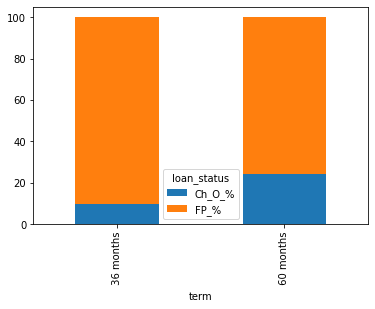

In [168]:
df15k2_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

In [169]:
df_20k = df.loc[df['loan_amnt_bin'] == '15k-20k']
df20k_1 = df_20k[['term','loan_status' ,'member_id']]
#df20k_1.head()
df_20k.iloc[0:7, 0:12]


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
56,1068409,1302790,16000,16000,15950.0,60 months,19.91,423.11,E,E4,7.0,RENT
61,1068934,1277395,17500,8950,8925.0,60 months,17.27,223.74,D,D3,6.0,RENT
62,1069136,1278095,17675,17675,17675.0,60 months,14.65,417.25,C,C3,0.0,RENT
67,1069030,1303473,16425,16425,16425.0,36 months,14.27,563.53,C,C2,4.0,RENT
79,1048390,1279714,18000,18000,18000.0,60 months,19.91,475.99,E,E4,10.0,MORTGAGE
96,1049528,1280928,20000,12800,12775.0,60 months,11.71,282.86,B,B3,4.0,MORTGAGE
97,1068542,1303143,17500,17500,17500.0,60 months,17.27,437.47,D,D3,7.0,MORTGAGE


In [170]:
df20k2_pivot = pd.pivot_table(df20k_1, index='term', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df20k2_pivot.head()


loan_status,Charged Off,Fully Paid
term,,
36 months,254,2026
60 months,469,1304


In [171]:
df20k2_pivot['Ch_O_%'] = round((df20k2_pivot['Charged Off']/( df20k2_pivot['Fully Paid']+ df20k2_pivot['Charged Off'])*100),2)
df20k2_pivot['FP_%'] = round((df20k2_pivot['Fully Paid']/( df20k2_pivot['Fully Paid']+ df20k2_pivot['Charged Off'])*100),2)
df20k2_pivot.head()


loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
term,,,,
36 months,254,2026,11.14,88.86
60 months,469,1304,26.45,73.55


<AxesSubplot:xlabel='term'>

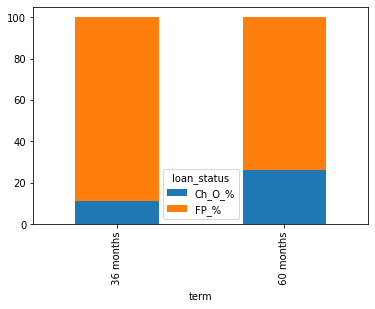

In [172]:
df20k2_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

In [173]:
df_term1 = df[['term','loan_status' ,'member_id']]
#df20k_1.head()
df_term1.iloc[0:7, 0:12]


,term,loan_status,member_id
0,36 months,Fully Paid,1296599
1,60 months,Charged Off,1314167
2,36 months,Fully Paid,1313524
3,36 months,Fully Paid,1277178
5,36 months,Fully Paid,1311441
6,60 months,Fully Paid,1304742
7,36 months,Fully Paid,1288686


In [175]:
df_term1_pivot = pd.pivot_table(df_term1, index='term', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df_term1_pivot.head()


loan_status,Charged Off,Fully Paid
term,,
36 months,3114,24607
60 months,2304,6629


In [176]:
df_term1_pivot['Ch_O_%'] = round((df_term1_pivot['Charged Off']/( df_term1_pivot['Fully Paid']+ df_term1_pivot['Charged Off'])*100),2)
df_term1_pivot['FP_%'] = round((df_term1_pivot['Fully Paid']/( df_term1_pivot['Fully Paid']+ df_term1_pivot['Charged Off'])*100),2)
df_term1_pivot.head()


loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
term,,,,
36 months,3114,24607,11.23,88.77
60 months,2304,6629,25.79,74.21


<AxesSubplot:xlabel='term'>

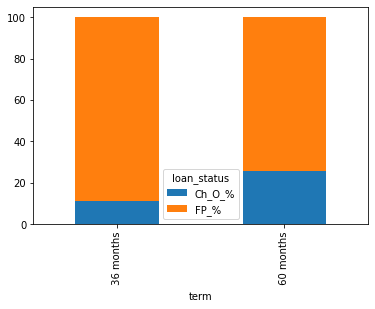

In [177]:
df_term1_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

### 1). ~14% increased chance of delinquency if the term is 60 months compared to 36 months
### 2). Individual Bins analyses also reveal similar picture - higher percentage of delinquency in 60 months term category compared to 36 months

## Univariate analysis

#### purpose

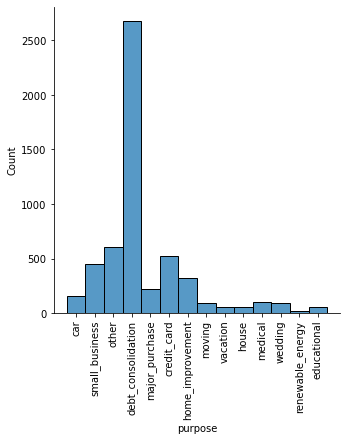

In [42]:
sns.displot(df[df.loan_status == 'Charged Off'], x="purpose")
plt.xticks(rotation=90)
plt.show()

<span style= 'background:yellow'>Based on above chart, people who take loan for debt_consolidation are the ones to be defaulters</span>

#### issue_year

<AxesSubplot:>

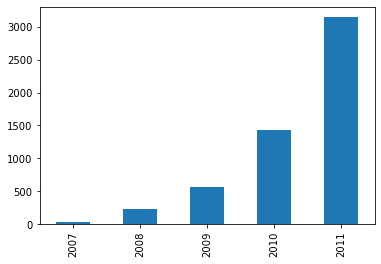

In [43]:
df[df.loan_status == 'Charged Off'].issue_year.value_counts().sort_index().plot.bar()

<span style= 'background:yellow'>Based on above chart, most of the defaulters are from year 2011. Maybe because of recession.</span>

#### loan_amnt

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

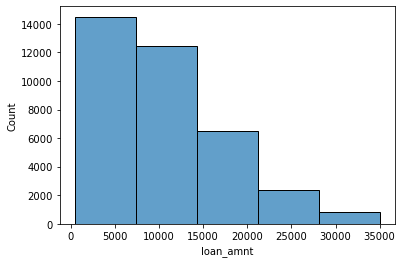

In [44]:
sns.histplot(df, x="loan_amnt", bins=5, alpha=0.7)

<span style= 'background:yellow'>People are mostly applying for lower loan amounts.</span>

#### home_ownership

## Bivariate analysis 

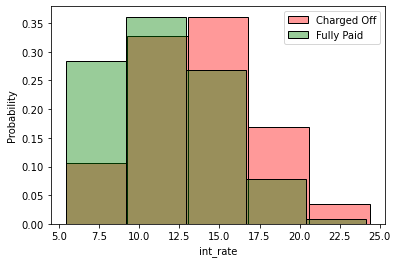

In [39]:
fig, ax = plt.subplots(1,1)
sns.histplot(df[df.loan_status == 'Charged Off'], x="int_rate", bins=5, stat='probability', ax=ax, label="Charged Off", color='red', alpha=0.4)
sns.histplot(df[df.loan_status == 'Fully Paid'], x="int_rate", bins=5, stat='probability', ax=ax, label="Fully Paid", color='green', alpha=0.4)
ax.legend()
plt.show()

<ul>
    <li><span style= 'background:yellow'>From above graph it is clear that loans with interest rate between 12.5 - 20 have high probability of getting charged off
    <li><span style= 'background:yellow'>Also it can be seen that as interest rate increases probability of loan getting defaulted increases</ul>


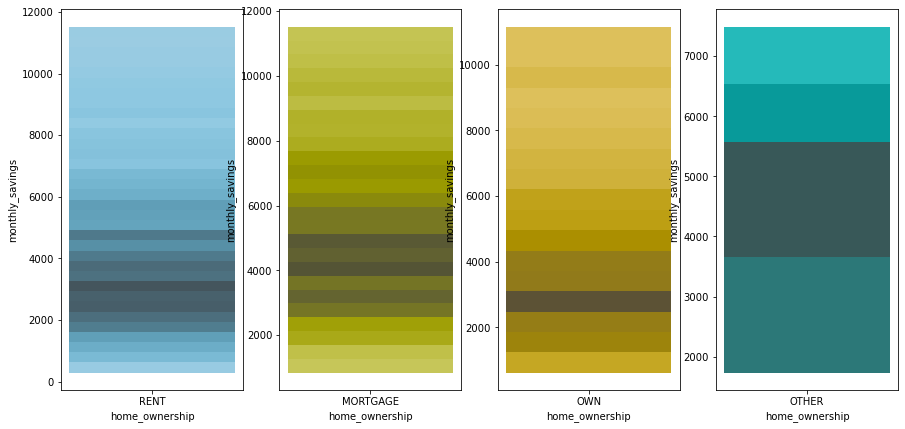

In [65]:
fig, axs = plt.subplots(1, 4, figsize=(15, 7))

sns.histplot(data=df[(df.loan_status == 'Charged Off') & (df.home_ownership == 'RENT') ], x="home_ownership", y="monthly_savings", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df[(df.loan_status == 'Charged Off') & (df.home_ownership == 'MORTGAGE')], x="home_ownership", y="monthly_savings", kde=True, color="olive", ax=axs[1])
sns.histplot(data=df[(df.loan_status == 'Charged Off') & (df.home_ownership == 'OWN')], x="home_ownership", y="monthly_savings", kde=True, color="gold", ax=axs[2])
sns.histplot(data=df[(df.loan_status == 'Charged Off') & (df.home_ownership == 'OTHER')], x="home_ownership", y="monthly_savings", kde=True, color="teal", ax=axs[3])

plt.show()

<span style= 'background:yellow'>People with rented or mortgaged house with saving between 3000 - 4500 are highly likely to be defaulters 

In [178]:
df.iloc[0:7, 0:12]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10.0,RENT
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,0.0,RENT
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10.0,RENT
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10.0,RENT
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3.0,RENT
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,8.0,RENT
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,9.0,RENT


In [179]:
df.iloc[0:7, 12:24]

,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
0,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3
1,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3
2,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2
3,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10
5,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9
6,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,280xx,NC,23.51,0,Jul-05,1,7
7,48000.0,Source Verified,Dec-11,Fully Paid,car,900xx,CA,5.35,0,Jan-07,2,4


In [180]:
df.iloc[0:7, 24:36]

,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries
0,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00
1,0,1687,9.4,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08
2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00
3,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00
5,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00
6,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,0.00
7,0,8221,87.5,4,0.0,0.0,3939.135294,3939.14,3000.00,939.14,0.00,0.00


In [182]:
df.iloc[0:7, 36:48]

,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_month,issue_year,monthly_savings,loan_amnt_bin
0,0.00,171.62,0.0,12,2011,1837.13,0-5k
1,1.11,119.66,0.0,12,2011,2440.17,0-5k
2,0.00,649.91,0.0,12,2011,936.67,0-5k
3,0.00,357.48,0.0,12,2011,3760.69,5k-10k
5,0.00,161.03,0.0,12,2011,2843.54,0-5k
6,0.00,1313.76,0.0,12,2011,3746.92,5k-10k
7,0.00,111.34,0.0,12,2011,3890.57,0-5k


### Exploring correlation between Loan Amnt and Int. Rate

In [189]:
df_amnt_vs_int = df[['loan_amnt', 'int_rate']]
df_amnt_vs_int.head()

,loan_amnt,int_rate
0,5000,10.65
1,2500,15.27
2,2400,15.96
3,10000,13.49
5,5000,7.90


<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

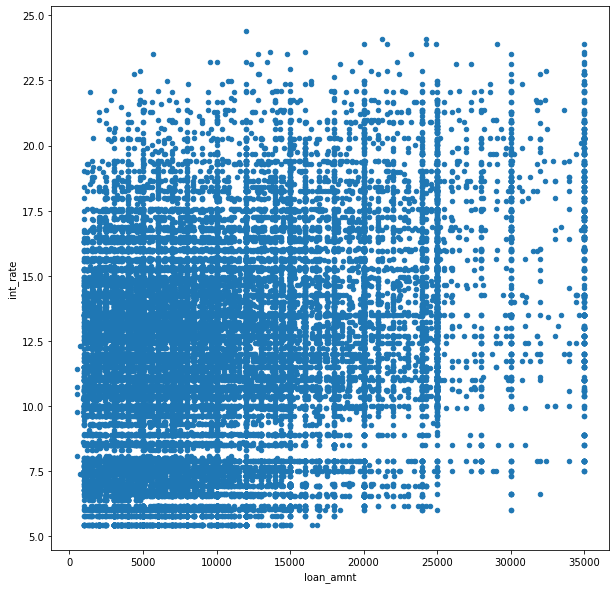

In [194]:
df_amnt_vs_int.plot.scatter(x = 'loan_amnt', y = 'int_rate', figsize=(10, 10))

In [192]:
df_amnt_vs_int.corr(method ='pearson')

,loan_amnt,int_rate
loan_amnt,1.000000,0.291189
int_rate,0.291189,1.000000


#### Correlation is 0.3% between Loan Amount and Int. Rate. Can be omitted from further analysis. 

In [196]:
df.emp_length.describe()

count    36654.000000
mean         4.876412
std          3.500417
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         10.000000
Name: emp_length, dtype: float64

In [200]:

df_home = df[['home_ownership','loan_status' ,'member_id']]

df_home.iloc[0:7, 0:12]


,home_ownership,loan_status,member_id
0,RENT,Fully Paid,1296599
1,RENT,Charged Off,1314167
2,RENT,Fully Paid,1313524
3,RENT,Fully Paid,1277178
5,RENT,Fully Paid,1311441
6,RENT,Fully Paid,1304742
7,RENT,Fully Paid,1288686


In [201]:
df_home_pivot = pd.pivot_table(df_home, index='home_ownership', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df_home_pivot.head()


loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2194,13481
OTHER,17,76
OWN,434,2418
RENT,2773,15261


In [202]:
df_home_pivot['Ch_O_%'] = round((df_home_pivot['Charged Off']/( df_home_pivot['Fully Paid']+ df_home_pivot['Charged Off'])*100),2)
df_home_pivot['FP_%'] = round((df_home_pivot['Fully Paid']/( df_home_pivot['Fully Paid']+ df_home_pivot['Charged Off'])*100),2)
df_home_pivot.head()

loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
home_ownership,,,,
MORTGAGE,2194,13481,14.00,86.00
OTHER,17,76,18.28,81.72
OWN,434,2418,15.22,84.78
RENT,2773,15261,15.38,84.62


<AxesSubplot:xlabel='home_ownership'>

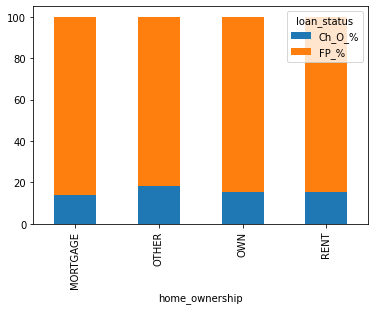

In [203]:
df_home_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True)

In [206]:
df_home_pivot.sort_values(by=['Ch_O_%'], ascending = False)

loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
home_ownership,,,,
OTHER,17,76,18.28,81.72
RENT,2773,15261,15.38,84.62
OWN,434,2418,15.22,84.78
MORTGAGE,2194,13481,14.00,86.00


#### Delinquency is higher in 'OTHER' home category, but since the count is small compared to other categories, this cannot be taken as a directive input. Among other three categories MORTGAGE has lower chance of delinquency compared to RENT and OWN

In [207]:
df.annual_inc.describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

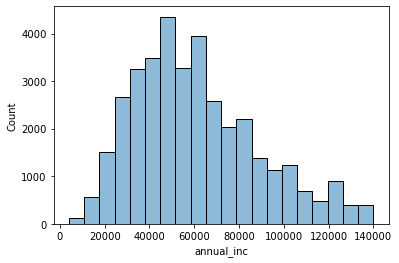

In [214]:
sns.histplot(df, x="annual_inc",bins=20, alpha=0.5)

In [217]:
df_purp = df[['loan_status','purpose' ,'member_id']]

df_purp.iloc[0:7, 0:12]


,loan_status,purpose,member_id
0,Fully Paid,credit_card,1296599
1,Charged Off,car,1314167
2,Fully Paid,small_business,1313524
3,Fully Paid,other,1277178
5,Fully Paid,wedding,1311441
6,Fully Paid,debt_consolidation,1304742
7,Fully Paid,car,1288686


In [218]:
df_purp_pivot = pd.pivot_table(df_purp, index='purpose', columns = 'loan_status', values = 'member_id',  aggfunc='count')
df_purp_pivot.head()


loan_status,Charged Off,Fully Paid
purpose,,
car,159,1289
credit_card,519,4264
debt_consolidation,2677,14628
educational,54,258
home_improvement,322,2234


In [222]:
df_purp_pivot['Ch_O_%'] = round((df_purp_pivot['Charged Off']/( df_purp_pivot['Fully Paid']+ df_purp_pivot['Charged Off'])*100),2)
df_purp_pivot['FP_%'] = round((df_purp_pivot['Fully Paid']/( df_purp_pivot['Fully Paid']+ df_purp_pivot['Charged Off'])*100),2)
df_purp_pivot



loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
purpose,,,,
car,159,1289,10.98,89.02
credit_card,519,4264,10.85,89.15
debt_consolidation,2677,14628,15.47,84.53
educational,54,258,17.31,82.69
home_improvement,322,2234,12.60,87.40
house,55,283,16.27,83.73
major_purchase,217,1829,10.61,89.39
medical,104,537,16.22,83.78
moving,90,460,16.36,83.64


In [227]:
df_purp_pivot = df_purp_pivot.sort_values(by=['Ch_O_%'], ascending = False)
df_purp_pivot

loan_status,Charged Off,Fully Paid,Ch_O_%,FP_%
purpose,,,,
small_business,454,1169,27.97,72.03
renewable_energy,18,77,18.95,81.05
educational,54,258,17.31,82.69
moving,90,460,16.36,83.64
other,605,3094,16.36,83.64
house,55,283,16.27,83.73
medical,104,537,16.22,83.78
debt_consolidation,2677,14628,15.47,84.53
vacation,52,313,14.25,85.75


<AxesSubplot:xlabel='purpose'>

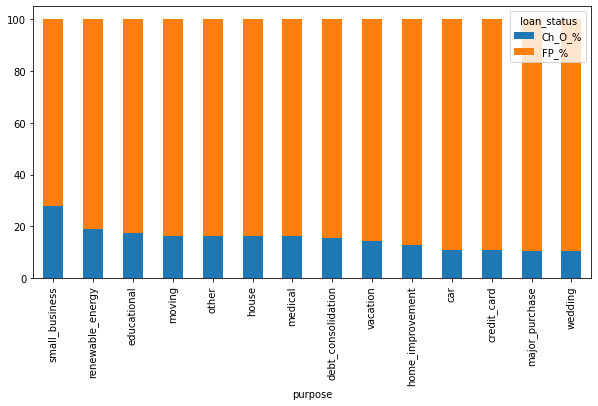

In [231]:
df_purp_pivot[['Ch_O_%', 'FP_%']].plot.bar(stacked = True, figsize=(10, 5))

In [228]:
27.97-10.3

17.669999999999998

In [229]:
18.95-10.3

8.649999999999999

#### Loan Purpose is coming out a key driver with purposes SMALL BUSINESS and showing higher delinquency ~18% higher than wedding, RENEWABLE ENERGY showing ~9% higher than wedding

#### Small business can be further analyzed by slicing the income group. For that need to bucketize the income into groups